In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
plt.figure(figsize=(12, 15))

<Figure size 864x1080 with 0 Axes>

<Figure size 864x1080 with 0 Axes>

In [2]:
# Read and convert xlsx sheets to pandas dataframes
def fromXLSXtoDF(sheetNames_param, xlsxData_param):
    allDF = []
    for i in sheetNames_param:
        # print the sheet name (not necessary)
        print(i)
        # so read each sheet named "i", and just the first two columns 0 and 1
        df = pd.read_excel(xlsxData_param, sheet_name=i, usecols=[0, 1])
        # set the timestamp to the index
        df = df.set_index("Timestamp")
        # add the dataframe to the list of dataframes
        allDF.append(df)
    # concatenate across rows (axis=1), use the index as key)
    result = pd.concat(allDF, axis=1, join='outer')
    # change names of columns to the sheetnames
    result.columns = sheetNames
    return(result)

In [3]:
# Calculate percentage changes and difference for each commodity dataframe
def percentComm(data1, commodName_param, percent_param, change_param, conversions):
    percentChange = pd.DataFrame()
    allDFsPerc = []
    for i in percent_param:
        data2 = data1.iloc[::-1].pct_change(i)
        allDFsPerc.append(data2[::-1])
        
    percentChange = pd.concat(allDFsPerc, axis=1, join='inner')
    percentChange.columns = ['% Move', 'W%mv', 'Mth%mv']
    
    allDFsChange = []
    for i in change_param:
        data2 = data1.iloc[::-1].diff(i)
        allDFsChange.append(data2[::-1])
        
    change = pd.concat(allDFsChange, axis=1, join='inner')
    change.columns = ['Wmv', 'Mthmv']    
   
    travisDF = pd.concat([data1, percentChange, change], axis=1, join="inner")
    
    #conversions
    firstDiff = data1.iloc[::-1].diff(1)
    travisDF["DMTmv"] = (conversions.get(commodName_param) * firstDiff)/100
     
    #order the columns
    travisDF = travisDF[[commodName_param, '% Move', 'Wmv', 'W%mv', 'Mthmv', 'Mth%mv', 'DMTmv']] 
   
    #save it
    travisDF.to_csv('travisDF_' + commodName_param + '.csv', index = True)
    travisDF.head(5)
    
    return(travisDF)

In [4]:
#Standardize data, makes comparisons easier
def scaleDF(myDF):
    resultsStd = myDF.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    results_scaled = min_max_scaler.fit_transform(resultsStd)
    myresults_scaled = pd.DataFrame(results_scaled)
    
    # change names of columns to the sheetnames
    myresults_scaled.columns = myDF.columns
    
    # add index back in
    indx = myDF.index
    myresults_scaled.set_index(indx, inplace=True)
    print(myresults_scaled.head())
    return(myresults_scaled)

In [5]:
#Run functions on selected data

#which commodities
sheetNames = ["Soybean", "Soymeal", "Soyoil", "Corn", "DalianSBM", "DalianSBO", "BRL", "CNY"]
#sheetNames = ["Soybean", "Soymeal"]

#select data from .xlsx sheet
xlsxData = "../../data/raw/Price Correlation.xlsx"
df = fromXLSXtoDF(sheetNames, xlsxData)
df.head(5)

#create Travis data
percentDiffs = [1,4,22]
diffs = [4,22]
conversions = {"Soybean":36.7454, "Soymeal":1, "Soyoil":1, "Corn":1, "DalianSBM":1, "DalianSBO":1, "BRL":1, "CNY":1}

percentAllComm = []
for i in sheetNames:   
    commod1 = df[[i]]
    #print(commod1)
    data3 = percentComm(commod1, i, percentDiffs, diffs, conversions)
    percentAllComm.append(data3)
    
#print(percentAllComm[0])      
print(percentAllComm[1])    
    

Soybean
Soymeal
Soyoil
Corn
DalianSBM
DalianSBO
BRL
CNY
            Soymeal    % Move  Wmv     W%mv  Mthmv  Mth%mv  DMTmv
Timestamp                                                        
2012-12-20      NaN  0.000000  NaN  0.00000    NaN     0.0    NaN
2012-12-21      NaN  0.000000  NaN  0.00000    NaN     0.0    NaN
2012-12-24      NaN  0.000000  NaN  0.00000    NaN     0.0    NaN
2012-12-25      NaN  0.000000  NaN  0.00000    NaN     0.0    NaN
2012-12-26      NaN  0.000000  NaN  0.00000    NaN     0.0    NaN
...             ...       ...  ...      ...    ...     ...    ...
2020-06-18    295.2  0.004423  1.6  0.00545    NaN     NaN  0.013
2020-06-19    293.9  0.002387  NaN      NaN    NaN     NaN  0.007
2020-06-22    293.2  0.002393  NaN      NaN    NaN     NaN  0.007
2020-06-23    292.5 -0.003747  NaN      NaN    NaN     NaN -0.011
2020-06-24    293.6       NaN  NaN      NaN    NaN     NaN    NaN

[1952 rows x 7 columns]


Soybean
Soymeal
Soyoil
Corn
DalianSBM
DalianSBO
BRL
CNY


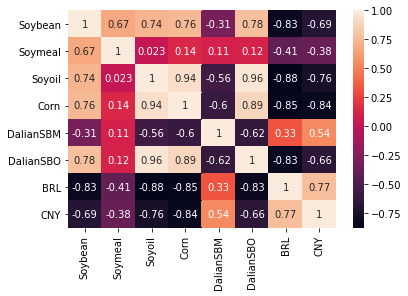

In [6]:
#Calculate correlations for raw data
sheetNames = ["Soybean", "Soymeal", "Soyoil", "Corn", "DalianSBM", "DalianSBO", "BRL", "CNY"]

#select data from .xlsx sheet
xlsxData = "../../data/raw/Price Correlation.xlsx"
df = fromXLSXtoDF(sheetNames, xlsxData)

# plot with ugly colors
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
#Calculate correlations for percentage data
perMove = []
for i in percentAllComm:
    perMove.append(i[['% Move']])
    
pctMove = pd.concat(perMove, axis = 1, join='inner')
pctMove.columns = sheetNames

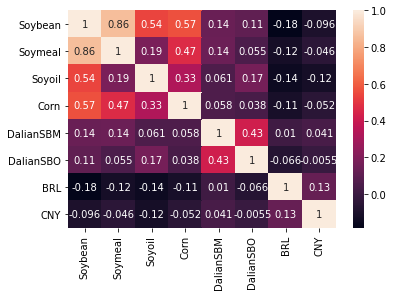

In [8]:
#Plot with ugly colors
sns.heatmap(pctMove.corr(), annot=True)
plt.show()

<Figure size 864x1080 with 0 Axes>

<Figure size 432x288 with 0 Axes>

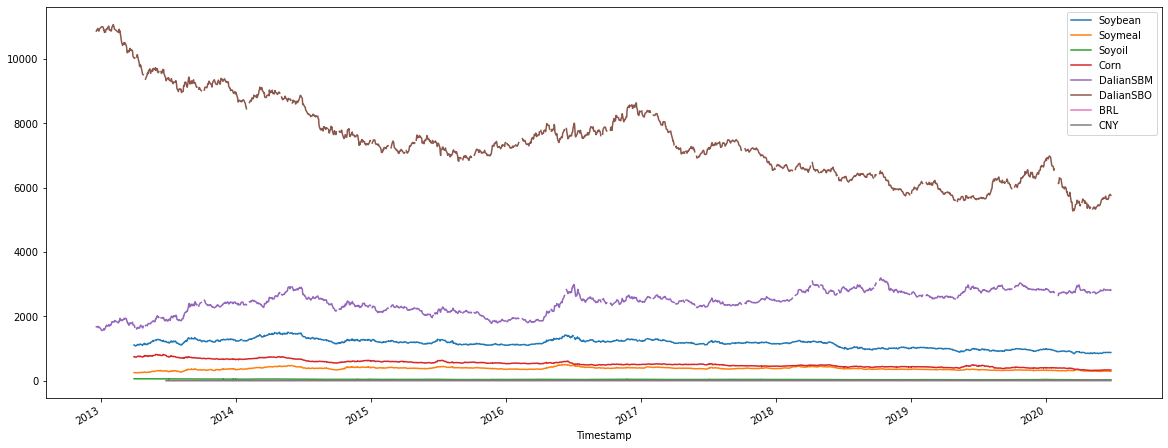

<Figure size 864x1080 with 0 Axes>

In [9]:
fig = plt.figure()
df.plot(figsize=(20,8));
plt.figure(figsize=(12, 15))

            Soybean  Soymeal  Soyoil  Corn  DalianSBM  DalianSBO  BRL  CNY
Timestamp                                                                 
2012-12-20      NaN      NaN     NaN   NaN   0.072738   0.964767  NaN  NaN
2012-12-21      NaN      NaN     NaN   NaN   0.069071   0.969257  NaN  NaN
2012-12-24      NaN      NaN     NaN   NaN   0.079462   0.978929  NaN  NaN
2012-12-25      NaN      NaN     NaN   NaN   0.057457   0.969603  NaN  NaN
2012-12-26      NaN      NaN     NaN   NaN   0.059902   0.967185  NaN  NaN


<Figure size 432x288 with 0 Axes>

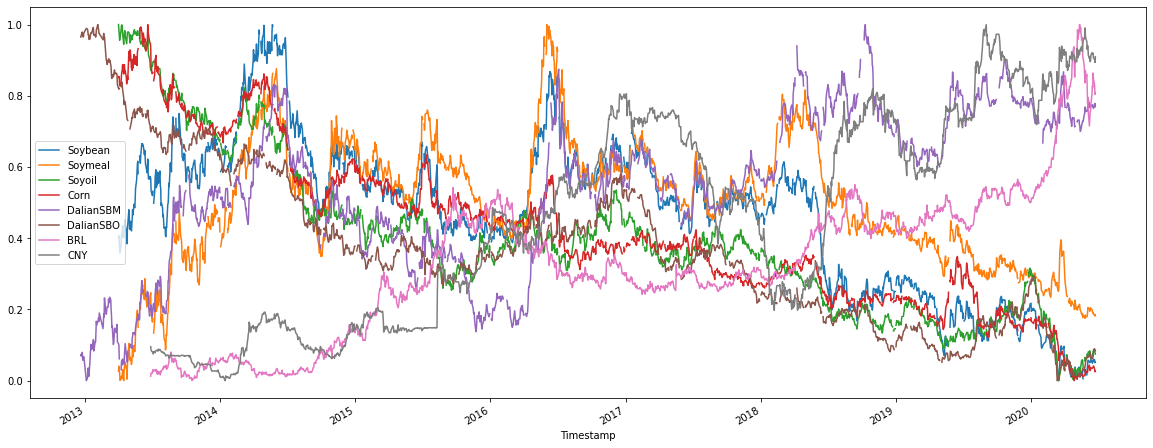

In [10]:
res_scaled = scaleDF(df)
fig = plt.figure()
res_scaled.plot(figsize=(20,8));